In [1]:
import torch
from sentence_transformers import SentenceTransformer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name).to(device)
model

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

c:\Users\radio\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
)

In [11]:
sentences = [
    "Anakin was a cunning warrior, and also a Jedi Knight.",
    "Obi-Wan and Anakin were best friends, fought side by side in Clone Wars.",
    "The F-35 is the world's first 5th gen fighter that has 3 variants, built by Lockheed Martin.",
    "Lockheed Martin's F-16 made it's first flight in 70's, but it's still modern thanks to modernization kits.",
    "iPhone 15 Pro Max has Titanium edges that gives the phone strength.",
    "Apple put Dynamic Island feature to iPhone 15's, making them special from 14 series."
]

In [12]:
embeddings = model.encode(sentences)
embeddings, embeddings.shape

(array([[-0.649375  ,  0.361656  , -0.06753982, ..., -0.36352068,
         -0.11371153, -0.38278082],
        [-0.62388504,  0.44142777, -0.12842062, ...,  0.25873977,
          0.50368625, -0.16851145],
        [-0.7547519 ,  0.60778373, -0.5713185 , ...,  0.05935173,
          0.790394  , -0.06479823],
        [-0.07498498,  0.79574096,  0.37345603, ...,  0.04140436,
          0.55242187,  0.1365477 ],
        [-0.4951913 ,  0.6235999 , -0.3428776 , ..., -1.2221409 ,
         -0.3537964 ,  0.08913343],
        [-0.22442356,  0.39571446,  0.63059264, ..., -0.4217671 ,
          0.00973579, -0.23836727]], dtype=float32),
 (6, 768))

In [13]:
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.63199198, 0.99999994, 0.        , 0.        , 0.        ,
        0.        ],
       [0.37322462, 0.43520716, 0.99999976, 0.        , 0.        ,
        0.        ],
       [0.43277487, 0.5026471 , 0.71176004, 1.00000012, 0.        ,
        0.        ],
       [0.49246499, 0.46189225, 0.44465107, 0.52000618, 0.99999988,
        0.        ],
       [0.29599044, 0.43210277, 0.40001374, 0.56559908, 0.64372683,
        0.99999976]])

<AxesSubplot: >

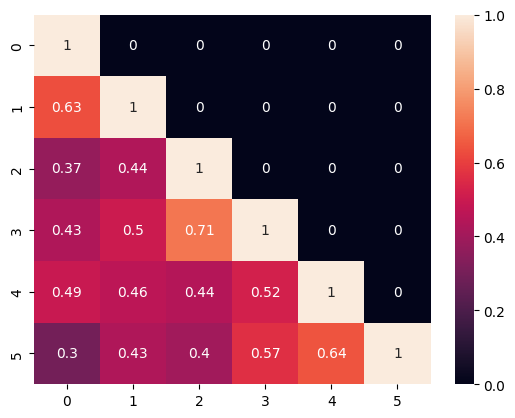

In [14]:
# This graph shows similarity scores between each of sentences
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True)